Running simulation... this may take a moment.


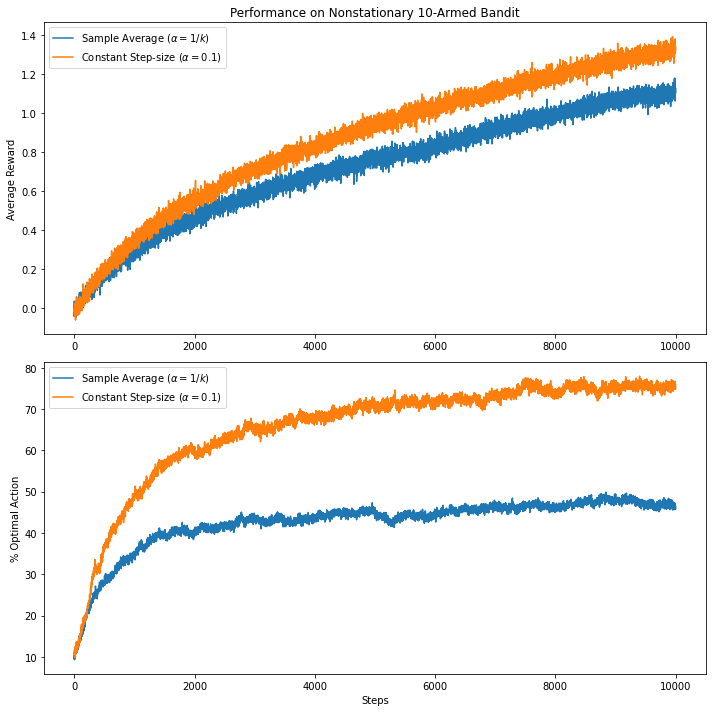

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def run_bandit_simulation(n_runs=2000, n_steps=10000, n_arms=10, epsilon=0.1):
    # Track the percentage of optimal actions and average rewards over time
    optimal_action_counts = {"sample_avg": np.zeros(n_steps), "constant_alpha": np.zeros(n_steps)}
    average_rewards = {"sample_avg": np.zeros(n_steps), "constant_alpha": np.zeros(n_steps)}
    
    # We can vectorize across runs for efficiency
    for method in ["sample_avg", "constant_alpha"]:
        # Initialize true values to be equal (zero) for all arms and runs
        q_true = np.zeros((n_runs, n_arms))
        
        # Initialize agent estimates (Q) and action counts (N)
        Q = np.zeros((n_runs, n_arms))
        N = np.zeros((n_runs, n_arms))
        
        for step in range(n_steps):
            # 1. Nonstationary random walk: add normal noise to true values
            q_true += np.random.normal(loc=0.0, scale=0.01, size=(n_runs, n_arms))
            
            # Determine the optimal action at this current step
            optimal_actions = np.argmax(q_true, axis=1)
            
            # 2. Epsilon-greedy action selection
            explore_mask = np.random.rand(n_runs) < epsilon
            random_actions = np.random.randint(0, n_arms, size=n_runs)
            greedy_actions = np.argmax(Q, axis=1)
            
            # Select random action if exploring, else greedy
            actions = np.where(explore_mask, random_actions, greedy_actions)
            
            # 3. Calculate rewards based on current true values
            rewards = np.random.normal(loc=q_true[np.arange(n_runs), actions], scale=1.0)
            
            # 4. Update estimates based on the chosen method
            N[np.arange(n_runs), actions] += 1
            
            if method == "sample_avg":
                # Step size is 1/k
                alpha = 1.0 / N[np.arange(n_runs), actions]
            else:
                # Step size is constant 0.1
                alpha = 0.1
                
            Q[np.arange(n_runs), actions] += alpha * (rewards - Q[np.arange(n_runs), actions])
            
            # 5. Record metrics for plotting
            is_optimal = (actions == optimal_actions)
            optimal_action_counts[method][step] = np.mean(is_optimal)
            average_rewards[method][step] = np.mean(rewards)
            
    return optimal_action_counts, average_rewards

# Run the simulation
print("Running simulation... this may take a moment.")
opt_counts, avg_rewards = run_bandit_simulation()

# Plotting the results
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Average Reward Plot
axes[0].plot(avg_rewards["sample_avg"], label=r'Sample Average ($\alpha = 1/k$)')
axes[0].plot(avg_rewards["constant_alpha"], label=r'Constant Step-size ($\alpha = 0.1$)')
axes[0].set_ylabel("Average Reward")
axes[0].set_title("Performance on Nonstationary 10-Armed Bandit")
axes[0].legend()

# % Optimal Action Plot
axes[1].plot(opt_counts["sample_avg"] * 100, label=r'Sample Average ($\alpha = 1/k$)')
axes[1].plot(opt_counts["constant_alpha"] * 100, label=r'Constant Step-size ($\alpha = 0.1$)')
axes[1].set_xlabel("Steps")
axes[1].set_ylabel("% Optimal Action")
axes[1].legend()

plt.tight_layout()
plt.show()